In [676]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from collections import defaultdict
from PIL import Image
import numpy as np
import pickle
import os
import math
import copy
import random

# *** NOTE: Change this when runnning on your local machine or another platform!!
map_path = '/Users/akhoshrozeh/Documents/UCLA/Fall21/ECE 134/projects/p2/Fairwood_South_of_Cascade_Elementary/'
os.chdir(map_path)

In [677]:
## This code collects the map partitions to produce a single array. There is only one map included in this project.
map = np.zeros((810,1210))
for i in range(10):
    for j in range(10):
        img_name = 'row-'+str(i+1)+'-column-'+str(j+1)+'.png'
        img = Image.open(img_name)
        img = img.convert('L')
        img = np.asarray(img)/255
        img = img[:81,:121]
        map[81*i:81*(i+1),121*j:121*(j+1)] = img

map = np.reshape(map,(810,1210))
map = map[:300,:300] 


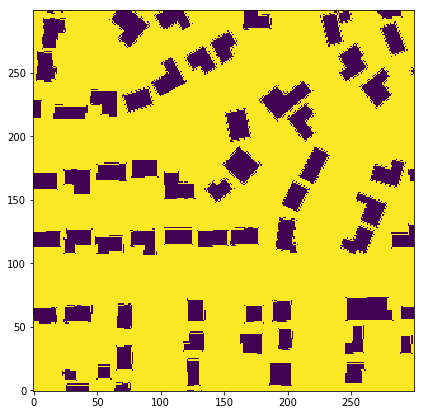

In [678]:
## Plot the map
plt.figure(figsize = (7,7))
plt.imshow(map, interpolation='nearest')
plt.gca().invert_yaxis()
# figure(figsize=(8, 6), dpi=80)
plt.show()

In [679]:
## Load the map
# img_name = 
# map = Image.open(img_name)

In [680]:
## Load the sensor locations
# *** NOTE: Change this when runnning on your local machine or another platform!!
os.chdir('/Users/akhoshrozeh/Documents/UCLA/Fall21/ECE 134/projects/p2')
with open('sensors.pkl', 'rb') as file:
    loc = pickle.load(file) 
    loc = np.array(loc) # sensor locations are stored in loc

In [681]:
## Function to draw the sensors from .pkl file onto the map
def draw_sensors(_map, _loc):
    plt.figure(figsize = (10,10))
    for i in _loc:
        plt.scatter(x=i[1], y=i[0], c='r', s=3)
    plt.imshow(_map, interpolation='nearest')
    plt.show()

# Exracts column i into an array
def column(matrix, i):
    return [row[i] for row in matrix]

# path is list of indices of vertices w.r.t. 'loc'
# NOT IMPLEMENTED YET: Drawing the map first
def draw_path(_map, _loc, _path):
    x = column(_path, 0) 
    y = column(_path, 1) 
    
    plt.figure(figsize = (15,15))
    for i in range(0, len(x)):
        plt.plot(x[i:i+2], y[i:i+2], 'ro-', markersize=2, linewidth=.5)

    plt.show()

# Used to test draw_path
def generate_rand_path(_size):
    path = []
    for i in range(0, _size):
        x = random.randint(0, 100)
        y = random.randint(0, 100)
        path.append([x,y])
    return path



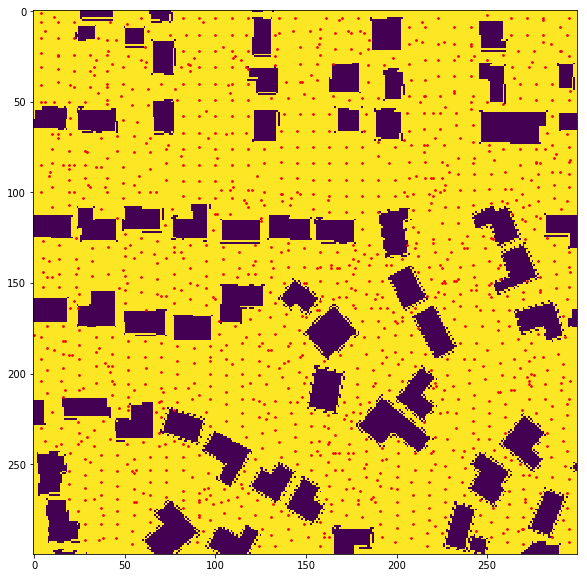

In [682]:
## Show sensor locations on the map
draw_sensors(map, loc)
# (x, y) = np.random.random(size=(2,100))

# Draw trajectory of the path
ex_path = [[1,3], [5,4], [7,7], [2,4]]
# rand_path = generate_rand_path(100)
# draw_path(map, loc, ex_path)

In [683]:
## Helper functions and classes

# pass in two Vertex objects
def calc_distance(v1, v2):
    delta_x = math.pow((v1.x - v2.x), 2)
    delta_y = math.pow((v1.y - v2.y), 2)
    return math.sqrt(delta_x + delta_y)



# Should mark all sensors within a 5x5 grid of curr pos as 'visited'
def within_square(pos):
    pass

class Edge:
    def __init__(self, u, v, weight):
        self.u = u
        self.v = v
        self.weight = weight
        self.visited = False

    def set_visited(self, val):
        self.visited = val

    def print(self):
        print("u: ", self.u, "v: ", self.v, "weight: ", self.weight)

        
# Reminder: [r][c] is actually [y][x]; we'll writing code in terms of [x][y] for ease
class Vertex:
    def __init__(self, vertex, id):
        self.x = vertex[1]
        self.y = vertex[0]
        self.id = id
        self.visited = False

    def set_visited(self, val):
        self.visited = val

    def get_values(self):
        return [self.x, self.y]

    

class Graph:
    def __init__(self, vertices):
        self.vertices = vertices
        self.matrix_size = len(vertices)
        self.adj_matrix = np.zeros((self.matrix_size, self.matrix_size))


    # Fill adj_matrix with distances as weights
    def create_complete_graph(self):
        for i in range(0, self.matrix_size):
            for j in range(0, self.matrix_size):
                self.adj_matrix[i][j] = calc_distance(self.vertices[i], self.vertices[j])
    
    # Returns True if all vertices are 'visited == True'
    def all_visited(self):
        for i in self.vertices:
            if i.visited == False:
                return False
        return True

# Pass 'loc' into here; translates coordinates into Vertex objects
# return value gets passed into constructor of Graph class
def create_vertices(_vertices):
    vertices = []
    id = 0
    for i in _vertices:
        v = Vertex(i, id)
        vertices.append(v)
        id += 1
    return vertices

# Pass in the index of vertices from loc;
# returns the values from adj_matrix
def get_distance(graph, v1_ind, v2_ind):
    return graph.adj_matrix[v1_ind][v2_ind]


In [684]:
# Create the graph
vertices = create_vertices(loc)
sensor_graph = Graph(vertices)
sensor_graph.create_complete_graph()
id_to_vertex = dict()
for i in range(0, len(vertices)):
    id_to_vertex[str(i)] = vertices[i]

In [685]:
print(id_to_vertex.get(str(2)).get_values())
vertices[2].get_values()

[140, 141]


[140, 141]

In [686]:
# Creating a dictionary/hashmap of [x,y] -> loc/graph.vertices index
# This will be used in the MST() function for union-find
vertex_to_index = {}
for i in range(0, len(sensor_graph.vertices)):
    vertex_to_index[str(sensor_graph.vertices[i].get_values())] = i

# print(vertex_to_index.get(str([108, 112])))
# vertex_to_index[str(sensor_graph.vertices[45].get_values())] = 45
# k = str(sensor_graph.vertices[45].get_values())
# print(k)
# print(vertex_to_index[k])


In [687]:
# Source: https://www.programiz.com/dsa/kruskal-algorithm
class GraphList:
    def __init__(self, V, vertices):
        self.V = V
        self.verticies = vertices
        self.graph = []

    def add_edge(self, u, v, w):
        self.graph.append([u, v, w])

    # Search function
    def find(self, parent, i):
        if parent[i] == i:
            return i
        return self.find(parent, parent[i])

    def apply_union(self, parent, rank, x, y):
        xroot = self.find(parent, x)
        yroot = self.find(parent, y)
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
        else:
            parent[yroot] = xroot
            rank[xroot] += 1

    #  Applying Kruskal algorithm
    def kruskal_algo(self):
        result = []
        i, e = 0, 0
        # print(self.graph[0][2])
        self.graph = sorted(self.graph, key=lambda item: item[2])
        parent = []
        rank = []
        for node in range(self.V):
            parent.append(node)
            rank.append(0)
        while e < self.V - 1:
            u, v, w = self.graph[i]
            i = i + 1
            x = self.find(parent, u)
            y = self.find(parent, v)
            if x != y:
                e = e + 1
                result.append([u, v, w])
                self.apply_union(parent, rank, x, y)
        return result

In [688]:
# Create the MST
g = GraphList(len(vertices), vertices)
for i in range(0, sensor_graph.matrix_size):
        for j in range(i+1, sensor_graph.matrix_size):
            g.add_edge(i, j, sensor_graph.adj_matrix[i][j])
            
mst = g.kruskal_algo()


# print(s_mst)
# print(type(mst))
# vis = []
# u and v are indexes into 'vertices'
# for u, v, weight in mst:
#     print("%d - %d: %f" % (u, v, weight))
#     vis.append(u)
#     vis.append(v)
# vis.sort()
# s = set(vis)
# print(len(s))


In [689]:
def dist(a, b):
    return math.sqrt(math.pow(b[0] - a[0], 2) + math.pow(b[1] - a[1], 2))

def index_to_point(ind):
    return vertices[ind].get_values()

s_mst = sorted(mst, key=lambda item:item[2])

# checking distances in mst are correct
for i in range(0, len(s_mst)):
    inds = s_mst[i]
    u = index_to_point(inds[0])
    v = index_to_point(inds[1])
    if inds[2] != dist(u,v):
        print("bad distance! : ", inds[2], dist(u,v))
# print(s_mst[len(s_mst)-1])
# print(index_to_point(613))
# print(index_to_point(1194))



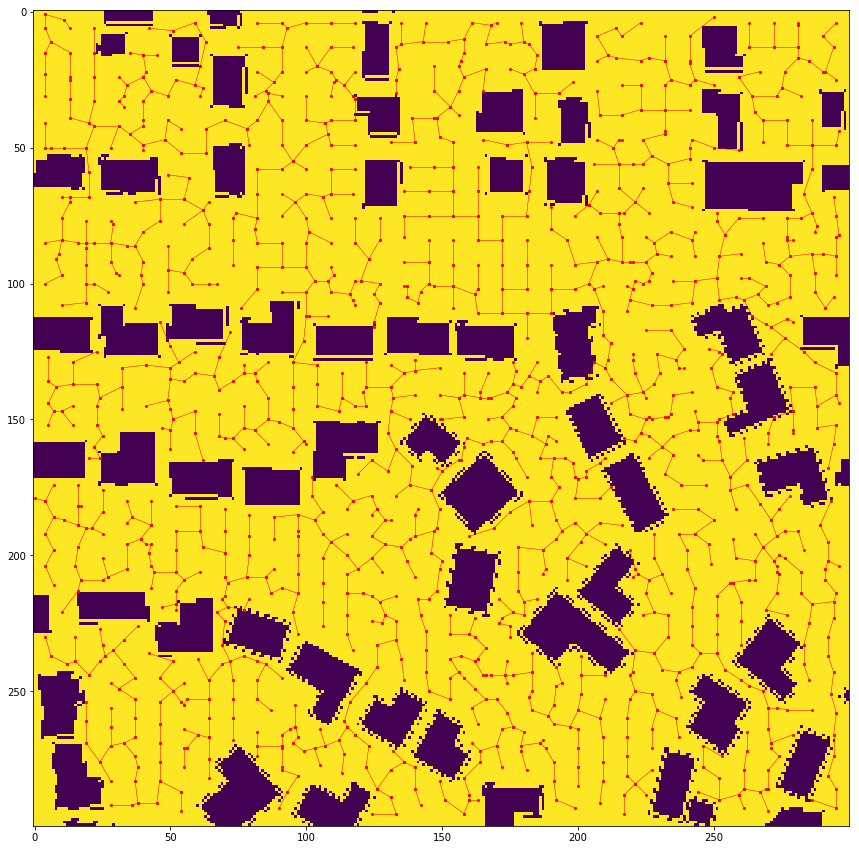

In [690]:
def draw_mst(mst):
    plt.figure(figsize = (15,15))
    x = []
    y = []
    for i in range(0, len(mst)):
        inds = s_mst[i]
        u = index_to_point(inds[0])
        v = index_to_point(inds[1])
        x = [u[0], v[0]]
        y = [u[1], v[1]]
        plt.plot(x, y, 'ro-', markersize=2, linewidth=.5)

    plt.imshow(map, interpolation='nearest')
    plt.show()

    
draw_mst(mst)

In [691]:
# https://www.educative.io/edpresso/how-to-implement-depth-first-search-in-python

tree = {}
for i in mst:
    u = i[0]
    v = i[1]
    if tree.get(u) == None:
        tree[u] = []
        tree[u].append(v)
    else:
        tree[u].append(v)

    if tree.get(v) == None:
        tree[v] = []
        tree[v].append(u)
    else:
        tree[v].append(u)

# print(tree)
visited = set() # Set to keep track of visited nodes.
path = []
def dfs(visited, tree, node, path):
    if node not in visited:
        # print (node)
        path.append(node)
        visited.add(node)
        if node in tree:
            for neighbour in tree[node]:
                dfs(visited, tree, neighbour, path)
        # else:
        #     visited.add(node)


dfs(visited, tree, 0, path)

# return to start (the sink/source)
path.append(0) 
print(len(path))



1270


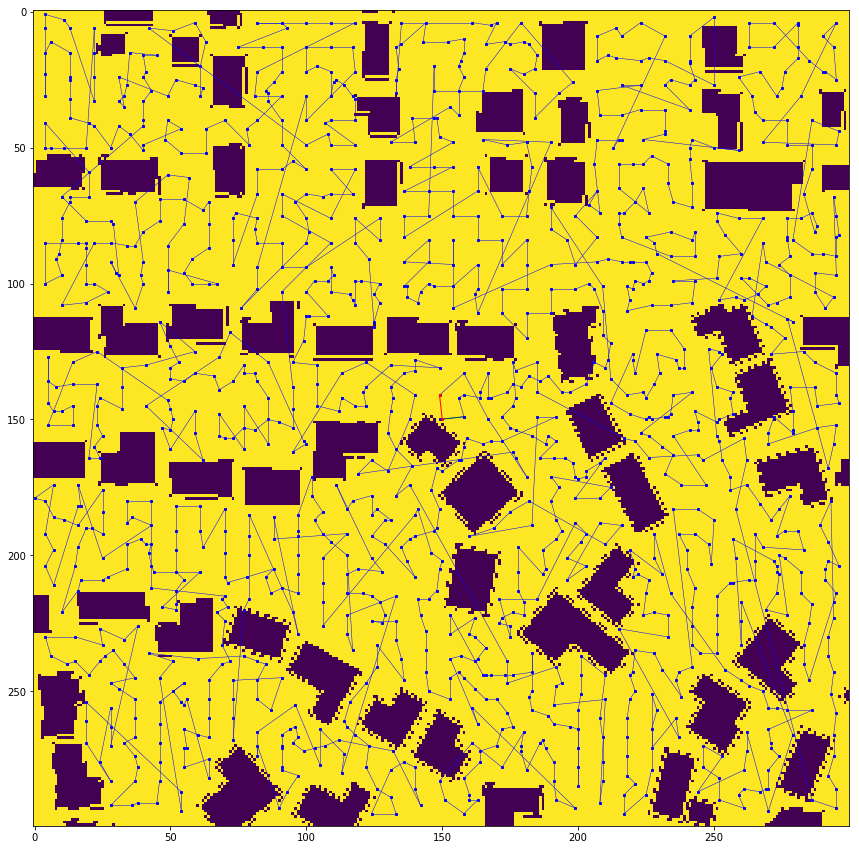

In [692]:
def draw_path2(_path):
    plt.figure(figsize = (15,15))
    for i in range(0, len(_path)-1):
        u = index_to_point(_path[i])
        v = index_to_point(_path[i+1])
        x = [u[0], v[0]]
        y = [u[1], v[1]]

        if i == 1:
            plt.plot(x, y, 'go-', markersize=2, linewidth=1)
        if i == len(_path)-2:
            plt.plot(x, y, 'ro-', markersize=2, linewidth=1)
        else:
            plt.plot(x, y, 'bo-', markersize=2, linewidth=.5)
    plt.imshow(map, interpolation='nearest')
    plt.show()

draw_path2(path)


In [693]:

# * So 'path' is an array of integers that are indexes into vertices
# * Now we must take into account the fact that the big drone can drop all sensors within a 5x5 radius
# * 
# *

class VertexRadius:
    def __init__(self, index, visited):
        self.index = index
        self.visited = visited
    
    def set_visited(self, vis):
        self.visited = vis;

# * Returns True if j is within 5x5 grid of i's location
def in_5_by_5(i, j):
    u = index_to_point(i)
    v = index_to_point(j)
    u_x = u[0]
    u_y = u[1]
    v_x = v[0]
    v_y = v[1]

    left_x = max(u_x-2, 0)
    right_x = min(u_x+2, 300)
    top_y = min(u_y+2, 300)
    bottom_y = max(u_y-2, 0)

    if v_x >= left_x and v_x <= right_x and v_y <= top_y and v_y >= bottom_y:
        return True
    return False

# print(in_5_by_5(i,j))
# print(vertices[i].get_values(), vertices[j].get_values())

vertex_radi = []
for i in path:
    v = VertexRadius(i, False)
    vertex_radi.append(v)

final_path = []
for i in range(0, len(vertex_radi)):
    if not vertex_radi[i].visited:
        vertex_radi[i].set_visited(True)
        final_path.append(vertex_radi[i].index)
        for j in range(0, len(vertex_radi)):
            if in_5_by_5(vertex_radi[i].index, vertex_radi[j].index): 
                vertex_radi[j].set_visited(True)

final_path.append(0)
print(final_path[0:10])
print(path[0:10])


# print(index_to_point(vertex_radi[0].index))




[0, 22, 1172, 860, 12, 18, 1076, 32, 758, 1157]
[0, 1, 22, 1172, 10, 860, 931, 12, 18, 699]


In [694]:
# argument: a _path of vertex indicies
# returns: total distance of the path
def path_distance(_path):
    distance = 0
    for i in range(0, len(_path)-1):
        u = index_to_point(_path[i])
        v = index_to_point(_path[i+1])
        distance += dist(u,v)

    return distance

scenario1_res = path_distance(final_path)
print(scenario1_res)
print(path_distance(path))


11821.404369171807
11951.021172698029


0 0
1270 1145


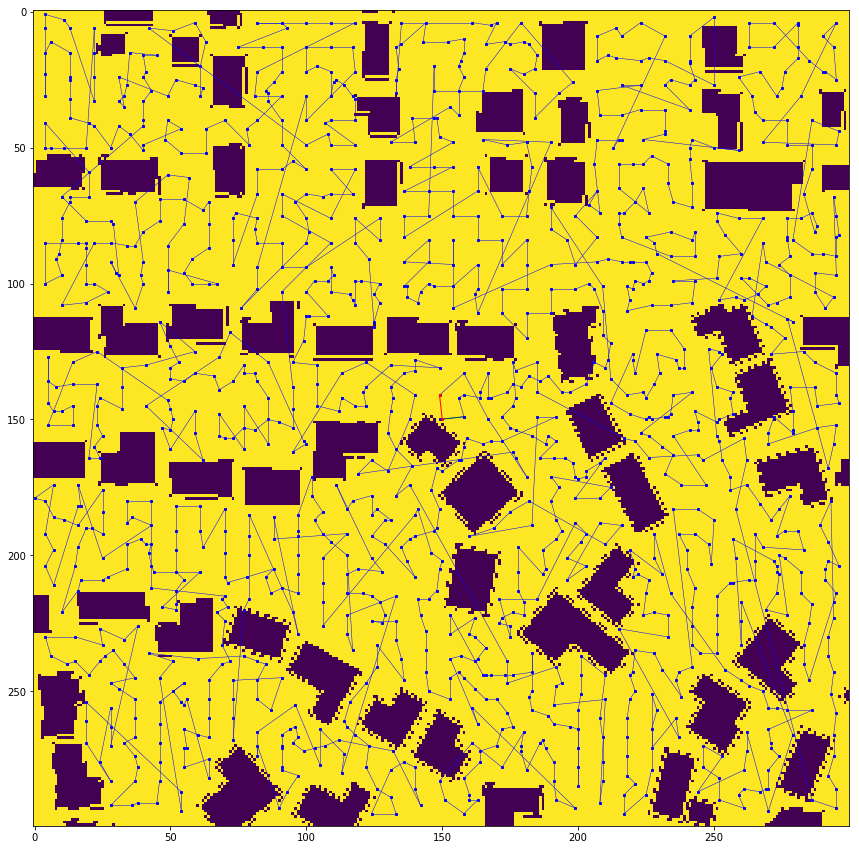

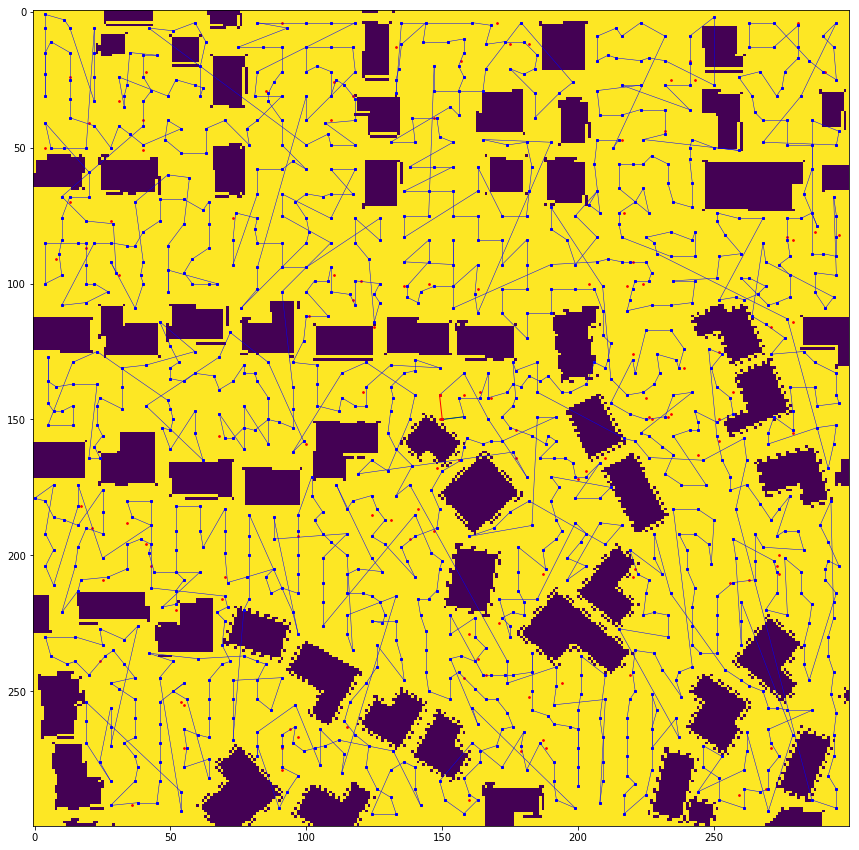

In [695]:
def draw_final_path(_path):
    plt.figure(figsize = (15,15))
    for i in loc:
        plt.scatter(x=i[1], y=i[0], c='r', s=3)

    
    for i in range(0, len(_path)-1):
        u = index_to_point(_path[i])
        v = index_to_point(_path[i+1])
        x = [u[0], v[0]]
        y = [u[1], v[1]]

        if i == 0:
            plt.plot(x, y, 'go-', markersize=2, linewidth=1)
        if i == len(_path)-2:
            plt.plot(x, y, 'ro-', markersize=2, linewidth=1)
        else:
            plt.plot(x, y, 'bo-', markersize=2, linewidth=.5)
    
    plt.imshow(map, interpolation='nearest')
    plt.show()

print(final_path[0], final_path[len(final_path)-1])
print(len(path), len(final_path))
draw_path2(path)
draw_final_path(final_path)

In [696]:
## Testing helper functions and classes

# Example of the list return from single route and how we calculate distance
ex_route = [0,3,2,1,0]
distance = 0
for i in range(0, len(ex_route) - 1):
    distance += get_distance(sensor_graph, ex_route[i], ex_route[i+1])

print("distance should be (roughly) 31.782 ")
print("distance calculated: ", distance)


# verifying that weights are correct for the first 4 sensors 
def check_weights():
    for i in range(0,4):
        for j in range(0,4):
            print(sensor_graph.adj_matrix[i][j], '\t\t', end = ' ')
        print()
    print('loc: ')
    for i in range(0,4):
        print(loc[i][0],',',loc[i][1])

distance should be (roughly) 31.782 
distance calculated:  31.783307199495272


# * SCENARIO 2
# * Approach: 
# * split up the map into m sectors of equal size
# * create m lists that contain all sensor locations within that sector
# * for each sector, create a complete graph of all vertices (each has the source included!)
# * create the mst for the graph in each sector
# * traverse the mst in each sector to create the path/route for each sector
# * now as each route is traversed, we keep track of the sensors dropped (sensors visited) and ...
# * ...also the total distance traveled current distance traveled on this run
# * note: can only carry 300 sensors and travel a distance 1100 units per run on the route
# * we'll need to keep track of the last node visited so when it flies back from the source
# * it knows where the location of the next sensor to drop is
# * -> The max(total_distance) of all routes will be the minimum deployment time

In [697]:
#  Returns a list of 2 element arrays, which denote [y1, y2)
def create_sectors(m):
    y_sector_ranges = []
    y0 = 0
    y1 = 0
    inc = 300 / m
    for i in range(0, m):
        y0 = y1
        y1 += inc
        y_sector_ranges.append([math.floor(y0),math.floor(y1)])
    
    return y_sector_ranges

# m = [1,3,5,8,10]
# for i in m:
#     print(create_sectors(i))

#  returns true 
def in_bounds(v, sector):
    vals = v.get_values()
    y = vals[1]
    if y >= sector[0] and y < sector[1]:
        return True
    

# returns all the sensor locations in each y sector range
def create_sector_sensors(y_sector_ranges):
    sensors_in_sector = []
    for i in range(0, len(y_sector_ranges)):
        sensors_in_sector.append([])
    # print(sensors_in_sector)
    
    for i in range(0, len(y_sector_ranges)):
        for v in vertices:
            if in_bounds(v, y_sector_ranges[i]):
                sensors_in_sector[i].append(v)

    return sensors_in_sector

        

sects = create_sectors(5)
print(sects)

sect_sens = create_sector_sensors(sects)
# for i in range(0, len(sect_sens)):
#     print(i)
#     for j in sect_sens[i]:
#         print(j.get_values())





[[0, 60], [60, 120], [120, 180], [180, 240], [240, 300]]


In [698]:
def draw_mst_s2(mst, sector, sector_sensors):
    plt.figure(figsize = (15,15))
    x = []
    y = []
    for i in range(0, len(mst)):
        edge = mst[i]
        v1 = sector_sensors[edge[0]].get_values()
        v2 = sector_sensors[edge[1]].get_values()
        x = [v1[0], v2[0]]
        y = [v1[1], v2[1]]
        plt.plot(x, y, 'ro-', markersize=2, linewidth=.5)

    plt.imshow(map, interpolation='nearest')
    plt.show()

In [699]:
def create_tree(mst):
    tree = {}
    for i in mst:
        u = i[0]
        v = i[1]
        if tree.get(u) == None:
            tree[u] = []
            tree[u].append(v)
        else:
            tree[u].append(v)

        if tree.get(v) == None:
            tree[v] = []
            tree[v].append(u)
        else:
            tree[v].append(u)

    return tree

def dfs_s2(visited, tree, node, path):
        if node not in visited:
            # print (node)
            path.append(node)
            visited.add(node)
            if node in tree:
                for neighbour in tree[node]:
                    dfs(visited, tree, neighbour, path)

# print(tree)
def get_prepath_s2(tree, node):
    visited = set() # Set to keep track of visited nodes.
    path = []
    dfs_s2(visited, tree, node, path)
    return path
        # else:
        #     visited.add(node)


# dfs(visited, tree, 0, path)

# return to start (the sink/source)
# path.append(0) 
# print(len(path))
def sector_prepath(mst, sector_sensors):
    tree = create_tree(mst)
    prepath = get_prepath_s2(tree, 0)
    return prepath
    


In [700]:
def draw_prepath_s2(_path, sector_sensors):
    plt.figure(figsize = (15,15))
    for i in range(0, len(_path)-1):
        ind1 = _path[i]
        ind2 = _path[i+1]

        v1 = sector_sensors[ind1].get_values()
        v2 = sector_sensors[ind2].get_values()
        # print(v1)
        x = [v1[0], v2[0]]
        y = [v1[1], v2[1]]
        
        

        # if i == 1:
        #     plt.plot(x, y, 'go-', markersize=2, linewidth=1)
        # if i == len(_path)-2:
        #     plt.plot(x, y, 'ro-', markersize=2, linewidth=1)
        # else:
        plt.plot(x, y, 'bo-', markersize=2, linewidth=.5)
    plt.imshow(map, interpolation='nearest')
    plt.show()

In [701]:
def draw_final_path_s2(_path):
    plt.figure(figsize = (15,15))
    for i in range(0, len(_path)-1):
        v1 = _path[i]
        v2 = _path[i+1]

        x = [v1[0], v2[0]]
        y = [v1[1], v2[1]]
  
        plt.plot(x, y, 'bo-', markersize=2, linewidth=.5)
    plt.imshow(map, interpolation='nearest')
    plt.show()

def draw_all_traj_s2(_paths):
    total_paths = len(_paths)
    colors = ['b', 'g', 'r', 'c', 'm', 'b', 'g', 'r', 'c', 'm',]
    # print(total_paths)
    plt.figure(figsize = (15,15))
    for i in range(0, total_paths):
        curr_path = _paths[i]
        # print(curr_path)
        color = colors[i] + 'o-'
        for j in range(0, len(curr_path)-1):
            v1 = curr_path[j]
            v2 = curr_path[j+1]

            x = [v1[0], v2[0]]
            y = [v1[1], v2[1]]
    
            plt.plot(x, y, color, markersize=2, linewidth=.5)
    plt.imshow(map, interpolation='nearest')
    plt.show()

In [702]:
# def calc_distance(v1, v2):
# we create a Vertex that represents the source ([150,150])
# this vertex will be the first vertex in sector_sensors
def adjust_path(_path, _sector_sensors):
    # print("LENGHT: ", len(_path))
    sector_sensors = copy.deepcopy(_sector_sensors)
    curr_sensors = 300
    curr_fuel = 1100
    final_path = []
    src = Vertex([150,150], len(sector_sensors))
    # sector_sensors.insert(0, src)
    # print("src id:", src.id)
    
    # print(_path)
    # print("len: ", len(sector_sensors))
    # print(sector_sensors[0].get_values())
    # print("max:", max(_path))
    # sector_sensors.insert(0, src)
    # print(sector_sensors[0].get_values())
    # print("len: ", len(sector_sensors))
    
    # find the max dist between 2 sensors
    # max_dist = 0
    # for i in range(0, _path-1):
    #     v1 = sector_sensors[_path[i]]
    #     v2 = sector_sensors[_path[i+1]]
    #     dist = calc_distance(v1, v2)
    #     if dist > max_dist:
    #         max_dist = dist
    final_path.append([150,150])
    total_distance = 0
    for i in range(0, len(_path)-2):
        # print("v:",_path[i])
        # print("v2:",_path[i+1])
        v1 = sector_sensors[_path[i]]
        v2 = sector_sensors[_path[i+1]]
        v3 = sector_sensors[_path[i+2]]

        curr_sensor_dis = calc_distance(v1, v2)
        nxt_sensor_dis = calc_distance(v2, v3)
        curr_src_dis = calc_distance(v1, src)
        nxt_src_dis = calc_distance(v2, src)
        
        con1 = curr_fuel - curr_sensor_dis - curr_src_dis >= 0
        con2 = curr_fuel - curr_sensor_dis - nxt_sensor_dis - nxt_src_dis >= 0
        con3 = curr_sensors - 1 > 0

        if con1 and con2 and con3:
            # final_path.append(_path[i])
            final_path.append(sector_sensors[_path[i]].get_values())
            # print("appending: ", sector_sensors[_path[i]].get_values())
            total_distance += curr_sensor_dis
            curr_fuel -= curr_sensor_dis
            curr_sensors -= 1

        else: 
            total_distance += curr_src_dis
            total_distance += nxt_src_dis
            # print("appending: ", sector_sensors[_path[i]].get_values())
            # print("appending: ", 0)
            # final_path.append(_path[i])
            # final_path.append(0)
            final_path.append(sector_sensors[_path[i]].get_values())
            final_path.append([150,150])
            curr_fuel = 1100
            curr_sensors = 300
            i -= 1



    final_path.append(sector_sensors[_path[len(_path)-2]].get_values())
    final_path.append(sector_sensors[_path[len(_path)-1]].get_values())
    final_path.append([150,150])

    return final_path, total_distance, sector_sensors

    

In [703]:
# Returns of list of the indices of sensors(Vertex objects) w.r.t. 'loc'
# The list represents the path taken; should start and end with 0 (the source/sink)
# From this list, we can calculate the distance taken using get_distance() each sequential pair and summing
def single_route(loc):
    # write a function that designs the route of the big sensor in scenario 1
    # route will be a sequence of positions ?
    source = 0
    sink = 0
    vertices = create_vertices(loc)
    sensor_graph = Graph(vertices)
    sensor_graph.create_complete_graph()
    g = GraphList(len(vertices), vertices)
    for i in range(0, sensor_graph.matrix_size):
        for j in range(i+1, sensor_graph.matrix_size):
            g.add_edge(i, j, sensor_graph.adj_matrix[i][j])
            
    mst = g.kruskal_algo()
    tree = {}
    for i in mst:
        u = i[0]
        v = i[1]
        if tree.get(u) == None:
            tree[u] = []
            tree[u].append(v)
        else:
            tree[u].append(v)

        if tree.get(v) == None:
            tree[v] = []
            tree[v].append(u)
        else:
            tree[v].append(u)

    # print(tree)
    visited = set() # Set to keep track of visited nodes.
    path = []
    def dfs(visited, tree, node, path):
        if node not in visited:
            # print (node)
            path.append(node)
            visited.add(node)
            if node in tree:
                for neighbour in tree[node]:
                    dfs(visited, tree, neighbour, path)
            # else:
            #     visited.add(node)


    dfs(visited, tree, 0, path)

    # return to start (the sink/source)
    path.append(0) 

    # take into account the big drone can drop all sensors in a 5x5 radius
    vertex_radi = []
    for i in path:
        v = VertexRadius(i, False)
        vertex_radi.append(v)

    final_path = []
    for i in range(0, len(vertex_radi)):
        if not vertex_radi[i].visited:
            vertex_radi[i].set_visited(True)
            final_path.append(vertex_radi[i].index)
            for j in range(0, len(vertex_radi)):
                if in_5_by_5(vertex_radi[i].index, vertex_radi[j].index): 
                    vertex_radi[j].set_visited(True)

    final_path.append(0)

    return final_path


def routes(m, loc):
    # list of lists
    routes = []
    y_sector_ranges = create_sectors(m)
    # sector sensors is an array of arrays; each array contains all vertices
    # inside the sector y range
    sector_sensors = create_sector_sensors(y_sector_ranges)
    
    sector_complete_graphs = []
    for i in sector_sensors:
        g = Graph(i)
        g.create_complete_graph()
        sector_complete_graphs.append(g)

    # creating the graph lists. these are used to finding the mst
    graph_lists = []
    for i in range(0, len(sector_complete_graphs)):
        V = len(sector_sensors[i])
        verts = sector_sensors[i]
        g = GraphList(V, verts)
        for j in range(0, sector_complete_graphs[i].matrix_size):
            for k in range(j+1, sector_complete_graphs[i].matrix_size):
                g.add_edge(j, k, sector_complete_graphs[i].adj_matrix[j][k])

        graph_lists.append(g)

    

    sector_msts = []
    for i in graph_lists:
        sector_msts.append(i.kruskal_algo())

    # print(sector_sensors[0][45].get_values())
    # print(sector_sensors[0][239].get_values())
    # print(sector_msts[0])

    # draws MST for each sector
    # for i in range(0, len(sector_msts)):
    #     draw_mst_s2(sector_msts[i], i, sector_sensors[i])

    # print(sector_path(sector_msts[0], sector_sensors[0]))

    # the 'prepath' is the traversal of the MST for that sector
    # we need to alter the path to account for starting at [150,150] and also 
    # fuel and sensor capacity constraints
    prepaths = [] 
    for i in range(0, m):
        prepaths.append(sector_prepath(sector_msts[i], sector_sensors[i]))
    # draw_prepath_s2(prepath[:15], sector_sensors[0])
    # print("prepath: ", prepath[:30])
    # for i in range(0, 30):
    #     print((sector_sensors[0][prepath[i]].get_values()))
    # # 
    results = []
    for i in range(0, m):
        results.append(adjust_path(prepaths[i], sector_sensors[i]))
        # final_path_updated, total_distance, sector_sensors_updated = adjust_path(prepath, sector_sensors[0])

    # print("pre aft: ", prepath[:30])
    # for i in range(0, 30):
    #     print((sector_sensors[0][prepath[i]].get_values()))
        
    # print("postpth: ", final_path_updated[:30], total_distance)
    # for i in range(0, 30):
    #     print(sector_sensors_updated[final_path_updated[i]].get_values())
    return results
    # draw_prepath_s2(prepath, sector_sensors[0])
    # draw_final_path_s2(final_path_updated)

    # draw_prepath_s2(final_path_updated[:30], sector_sensors_updated)

   


    # write a function that designs the paths for the m sensors to minimize the tota deployment time
    # return the deployment time


def simplify_graph(loc):
    # optional: write a function to simplify the map graph by ignoring some paths
    pass

# You can choose any data structure you think best to represent nodes, graphs, and any other data types.

11821.404369171807


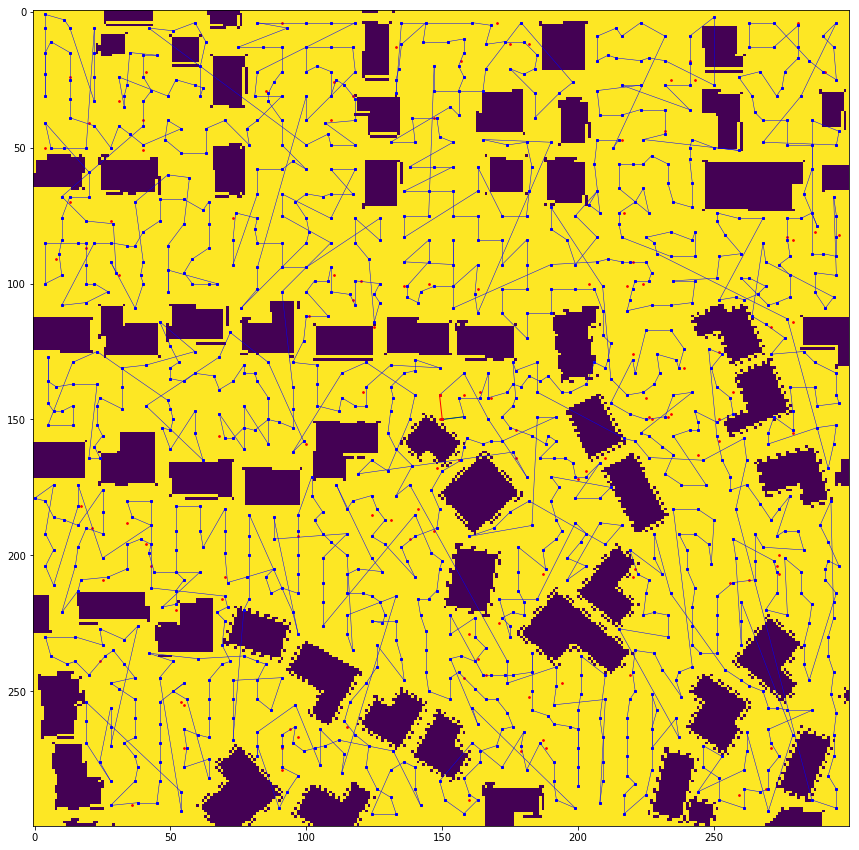

In [704]:
## Results for Scenario 1
scen1_path = single_route(loc)
scen1_dist = path_distance(scen1_path)
print(scen1_dist)
draw_final_path(scen1_path)

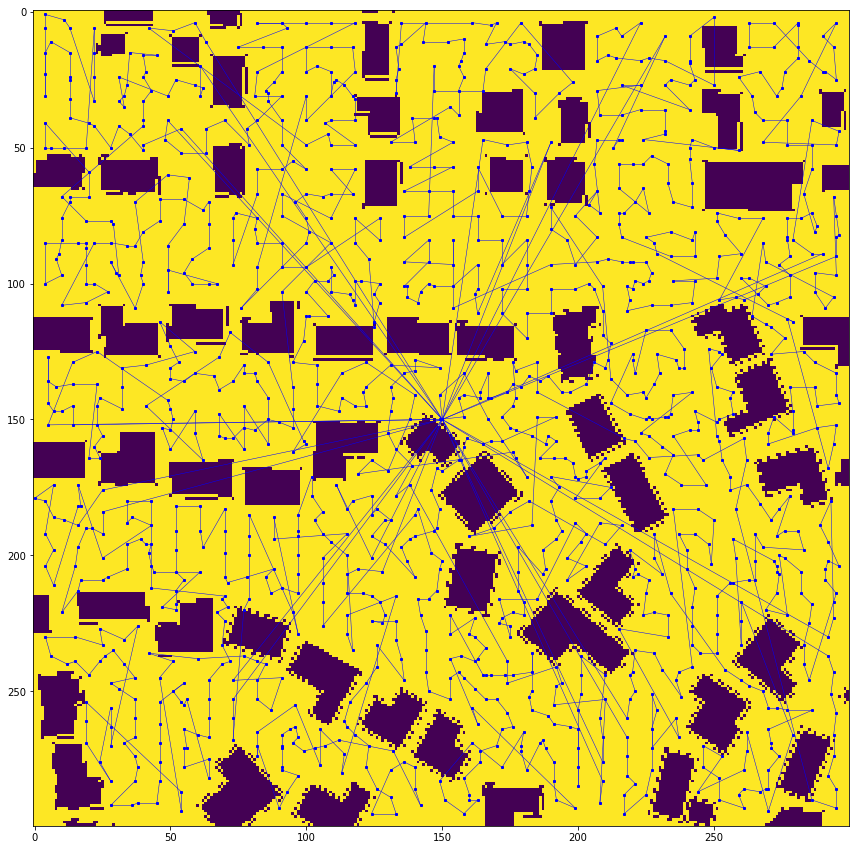

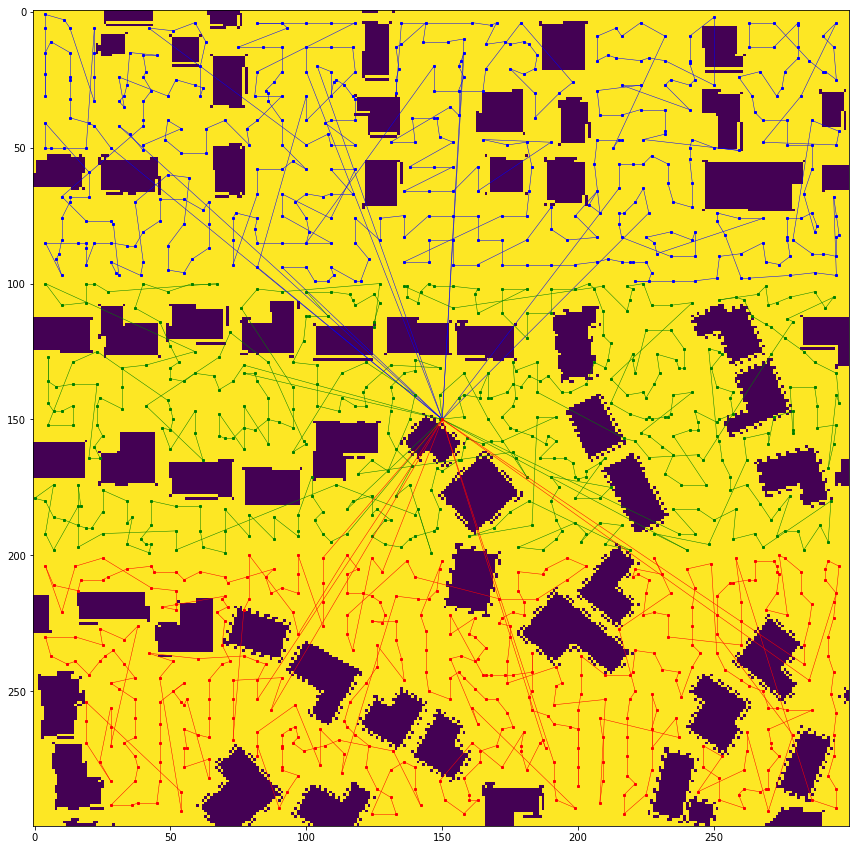

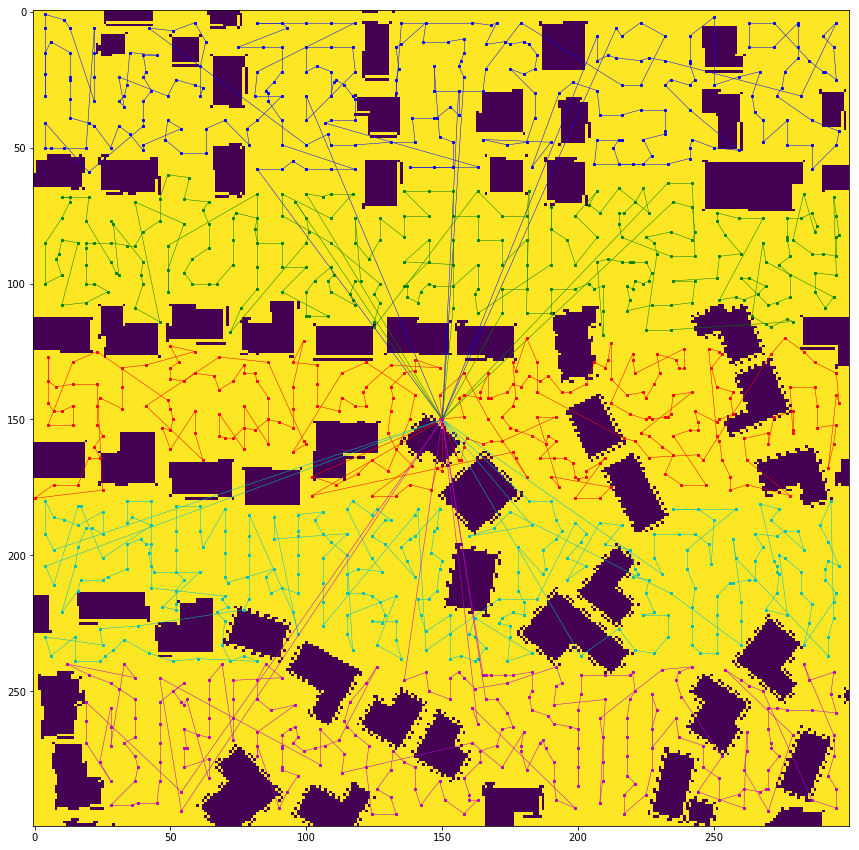

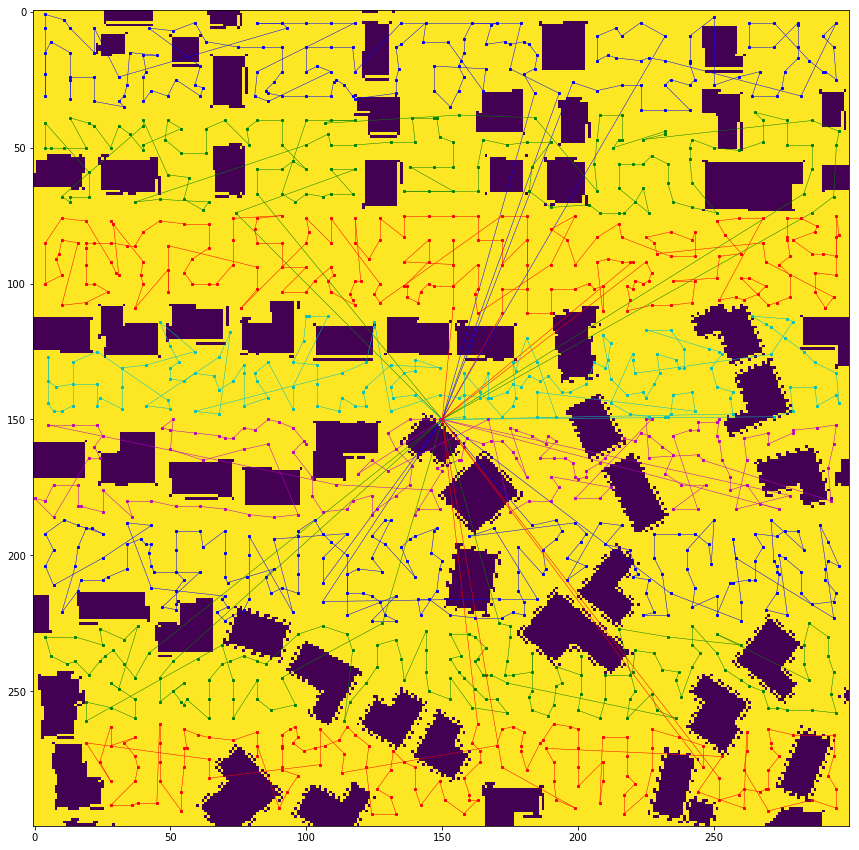

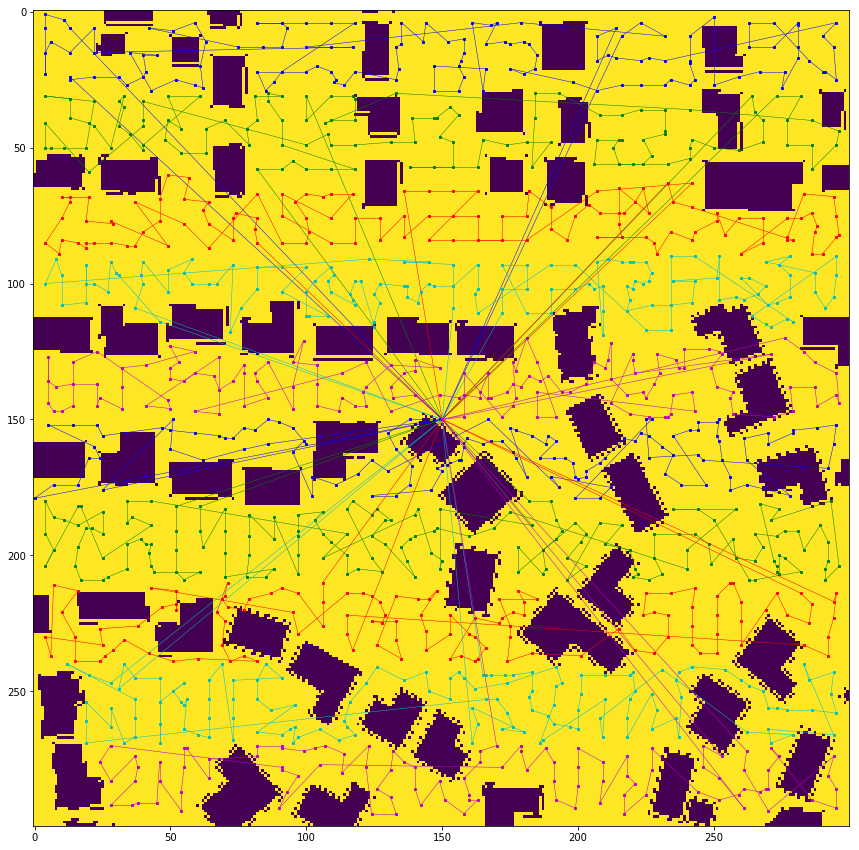

[[15073.415654791703], [4961.225030843297, 4401.209208219097, 4618.882152446568], [2871.2601788623706, 2753.6780511120014, 2380.769537822197, 3113.9518643560564, 2752.523669974015], [1653.463634993355, 1652.5258415571795, 1909.4195661201186, 1613.3765152515805, 1602.880322400676, 1853.8101711996933, 1531.064723645318, 1563.8130531094864], [1581.7507947947358, 1548.4198064481745, 1330.1032508850649, 1466.7322487865895, 1473.7430470467955, 1277.7580171121238, 1643.1259766071646, 1447.634778921333, 1567.6228412242444, 1280.8706344521893]]
max dists: [15073.415654791703, 4961.225030843297, 3113.9518643560564, 1909.4195661201186, 1643.1259766071646]
deplyoment ratios: [15073.415654791703, 1653.7416769477657, 622.7903728712113, 238.67744576501482, 164.31259766071645]


In [705]:
num_drones = [1,3,5,8,10]
distances = []
max_dists = []
for m in num_drones:
    res = routes(m, loc)
    drone_dists = []
    drone_paths = []
    for i in range(0, len(res)):
        drone_dists.append(res[i][1])
        drone_paths.append(res[i][0])
        # print("distance:", res[i][1])
        # draw_final_path_s2(res[i][0])
    distances.append(drone_dists)
    draw_all_traj_s2(drone_paths)
print(distances)
for i in distances:
    max_dists.append(max(i))
print("max dists:",max_dists)
deployment_ratios = []
for i in range(0, len(max_dists)):
    deployment_ratios.append(max_dists[i]/num_drones[i])
print("deplyoment ratios:", deployment_ratios)


In [706]:
# plot the number of drones vs total deployment time